# European Social Survey Sample Tests
The European Social Survey (ESS) is an academically-driven multi-country survey, which has been administered in over 30 countries to date. 
In this dataset, the same participants answered questions in 2012 and again 2014. 

## Goal: 
The goal is to compare these samples to answer the following questions:

1. Did people become less trusting from 2012 to 2014? 
2. Did people become happier from 2012 to 2014? 
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. How often people in different countries met socially in 2014. Are there differences, and if so, which countries stand out?
6. How often people in different countries  ook part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

## Methods:
For each question I'll use one of the below mentioned statistics tests:

 - Parametric:
* F-test - assumes that the two samples has the same variance
* T-test - assumes that the difference beetwen samples' means are is ZERO
* Z-test - assumes that the means of two samples are not different
* One-way ANOVA - assumes that the three or more samples has the same variance
* Turkey's HSD test - assumes that the means of three or more samples are same

 - Non-parametric:
*  Mann-Whitney U-test - assumes that the two distributions are similar in shape

In [0]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[12,5]

import seaborn as sns
from scipy.stats import norm

# tests
from statsmodels.stats.weightstats import ztest
from scipy.stats import wilcoxon, f_oneway, kruskal, mannwhitneyu as utest
from statsmodels.stats.multicomp import pairwise_tukeyhsd




import warnings
warnings.filterwarnings('ignore')

## 1. EDA
First, I'll load and explore the data to get better idea what I'm dealing with.

In [0]:
url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv'
df = pd.read_csv(url)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [0]:
# missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [0]:
# descriptive statistics of the dataset
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,agea
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,2013.000614,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,47.262182
std,6.320721e+05,1.000061,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,18.316890
min,1.000000e+00,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
25%,1.063000e+03,2012.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,33.000000
50%,1.749000e+03,2014.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,47.000000
75%,2.778000e+03,2014.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,61.000000
max,1.100143e+07,2014.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,114.000000


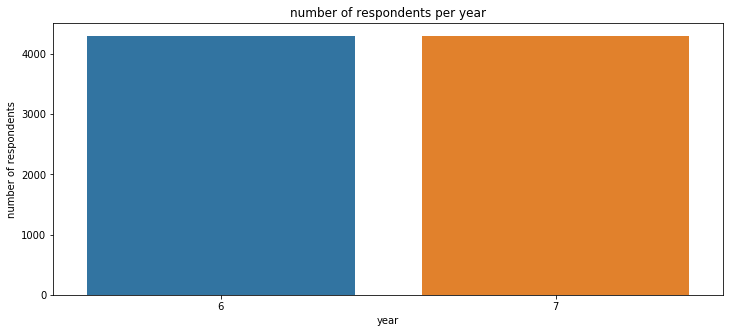

7    4297
6    4297
Name: year, dtype: int64

In [0]:
# check the year column
_ = sns.countplot(df.year)
_.set(title = 'number of respondents per year', ylabel = 'number of respondents')
plt.show()
df.year.value_counts()


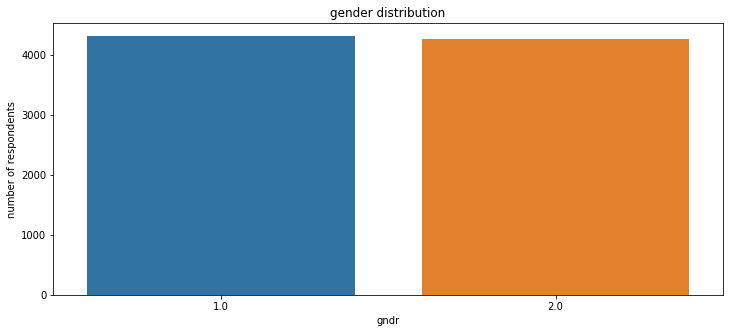

1.0    4316
2.0    4268
Name: gndr, dtype: int64

In [0]:
# check the gender column
_ = sns.countplot(df.gndr)
_.set(title = 'gender distribution', ylabel = 'number of respondents')
plt.show()
df.gndr.value_counts()

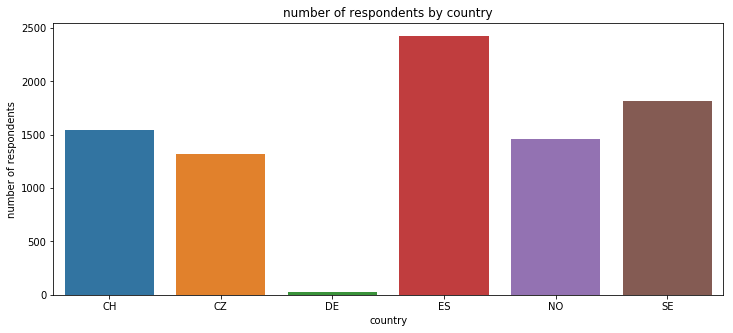

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [0]:
# check the country column
_ = sns.countplot(df.cntry)
_.set(title = 'number of respondents by country', ylabel = 'number of respondents', xlabel = 'country')
plt.show()

# number of respondents for each country
df.cntry.value_counts()

## 2. Data Cleaning
As we have missing values in the dataset, before moving forward I'll remove them. And also, I'll create 2 new datasets each representing the survey results for 2012 and 2014 years.

In [0]:
# remove missing values
df = df.dropna()
df.isnull().sum()

cntry      0
idno       0
year       0
tvtot      0
ppltrst    0
pplfair    0
pplhlp     0
happy      0
sclmeet    0
sclact     0
gndr       0
agea       0
partner    0
dtype: int64

In [0]:
# replacing year column values
df['year'] = df['year'].map({6: 2012, 7: 2014})

# replacing gender column values
df['gndr'] = df['gndr'].map({1:'male', 2:'female'})

# replacing partner column values
df['partner'] = df['partner'].map({1:'alone', 2:'couple'})

In [0]:
# create 2 data sets for each year
df2012 = df[df['year'] == 2012]
df2014 = df[df['year'] == 2014]
print(df2012.shape)
print(df2014.shape)

(4071, 13)
(4076, 13)


## 3. Searching for answers

Now we are ready to find the answers to our questions



* ### 3.1 Did people become less trusting from 2012 to 2014?

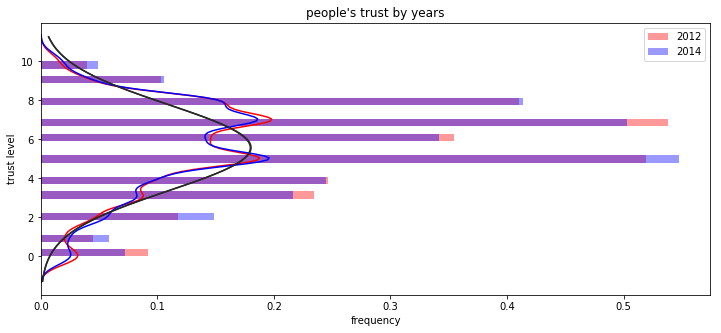

year
2012    5.578482
2014    5.571394
Name: ppltrst, dtype: float64

In [0]:
# histogram to see the change in people's trust 
_ = sns.distplot(df2012['ppltrst'], fit = norm, kde = True, color = 'red', label = '2012', vertical = True)
_ = sns.distplot(df2014['ppltrst'], fit = norm, kde = True, color = 'blue', label = '2014', vertical = True)
_.set(title = "people's trust by years", xlabel = 'frequency', ylabel = 'trust level')
plt.legend()
plt.show()

# mean trust by year
df.groupby('year')['ppltrst'].mean()

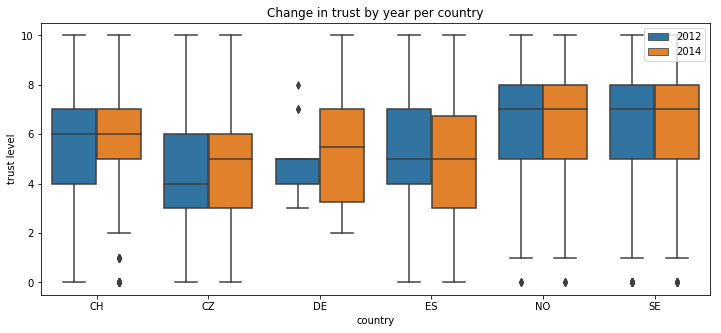

In [0]:
# people's trust by country
_ = sns.boxplot(x = 'cntry', y = 'ppltrst', hue = 'year', data = df)
_.set(title = 'Change in trust by year per country', xlabel = 'country', ylabel = 'trust level')
plt.legend(loc = 'upper right')
plt.show()

* We can observe the normality of distribution. Depending on country, the same respondents give different answers through years. I'll run **Z-test** as *parametric*  and **Wilcoxon test** as *non-parametric* test to see if there is a real change in people's trust by year per country.

In [0]:
for cntry in df['cntry'].unique().tolist():
  x1 = df2012[df['cntry'] == cntry]['ppltrst']
  x2 = df2014[df['cntry'] == cntry]['ppltrst']
  
  # make sure both samples have the same lenght
  lenx1, lenx2 = len(x1), len(x2)
  if lenx1 > lenx2:
    x1 = x1[:lenx2]
  else:
    x2 = x2[:lenx1]
  
  zresult = ztest(x1,x2)
    
  print(cntry, '\t', 'z-test result: z-score = {}, pvalue = {}'.format(zresult[0], zresult[1]))
  print('\t', wilcoxon(x1,x2))

CH 	 z-test result: z-score = -0.7043593031353971, pvalue = 0.4812090434731674
	 WilcoxonResult(statistic=97323.0, pvalue=0.5553997503173174)
CZ 	 z-test result: z-score = 0.3420871237812588, pvalue = 0.7322853272841529
	 WilcoxonResult(statistic=70943.0, pvalue=0.8339189113309622)
DE 	 z-test result: z-score = -0.6793662204867573, pvalue = 0.49690584756476797
	 WilcoxonResult(statistic=30.5, pvalue=0.5022609941677378)
ES 	 z-test result: z-score = 2.1227809764934507, pvalue = 0.03377220967871167
	 WilcoxonResult(statistic=205134.5, pvalue=0.0242005176212083)
NO 	 z-test result: z-score = 0.5495946218672356, pvalue = 0.5825974484466114
	 WilcoxonResult(statistic=78707.0, pvalue=0.6406594408625819)
SE 	 z-test result: z-score = -2.1030400762189134, pvalue = 0.03546226640184153
	 WilcoxonResult(statistic=118894.0, pvalue=0.04299772898275245)


* Only in two cases - Sweden and Spain we reject the **null hypothesis** *(p < 0.05)* that the means of two samples are not different. This means, compared to 2012 people  in Sweden and Spain experience real changes in trust.

* ### 3.2 Did people become happier from 2012 to 2014?

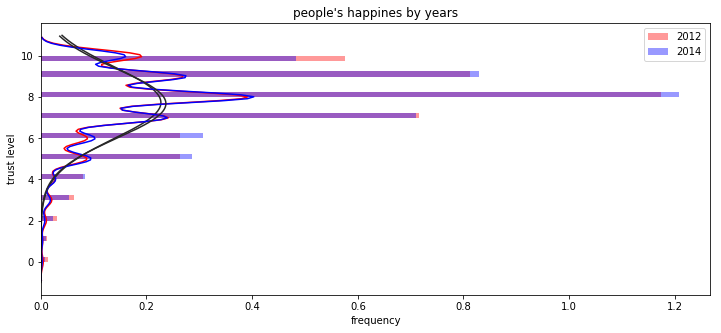

year
2012    7.731516
2014    7.685476
Name: happy, dtype: float64

In [0]:
# histogram to see the change in people's happines
_ = sns.distplot(df2012['happy'], fit = norm, kde = True, color = 'red', label = '2012', vertical = True)
_ = sns.distplot(df2014['happy'], fit = norm, kde = True, color = 'blue', label = '2014', vertical = True)
_.set(title = "people's happines by years", xlabel = 'frequency', ylabel = 'trust level')
plt.legend()
plt.show()

# mean trust by year
df.groupby('year')['happy'].mean()

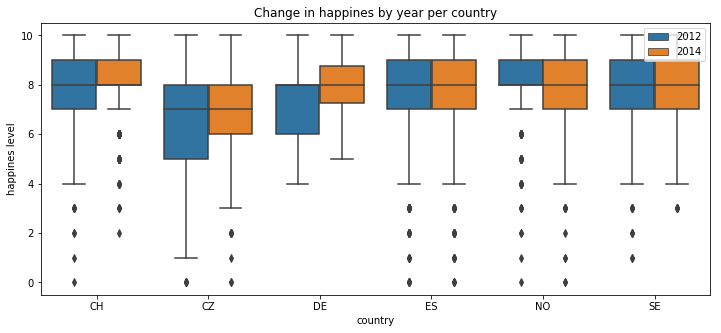

In [0]:
# people's happines by country
_ = sns.boxplot(x = 'cntry', y = 'happy', hue = 'year', data = df)
_.set(title = 'Change in happines by year per country', xlabel = 'country', ylabel = 'happines level')
plt.legend(loc = 'upper right')
plt.show()

* The distribution of happines also is normal which allows us to apply **Z-test**. Additionally, I'll check statistics for **Wilcoxon test**  results.

In [0]:
for cntry in df['cntry'].unique().tolist():
  x1 = df2012[df['cntry'] == cntry]['happy']
  x2 = df2014[df['cntry'] == cntry]['happy']
  
  # make sure both samples have the same lenght
  lenx1, lenx2 = len(x1), len(x2)
  if lenx1 > lenx2:
    x1 = x1[:lenx2]
  else:
    x2 = x2[:lenx1]
  
  zresult = ztest(x1,x2)
    
  print(cntry, '\t', 'z-test result: z-score = {}, pvalue = {}'.format(zresult[0], zresult[1]))
  print('\t', wilcoxon(x1,x2))

CH 	 z-test result: z-score = -0.799165981883738, pvalue = 0.42419417435722784
	 WilcoxonResult(statistic=72908.5, pvalue=0.5767042949680168)
CZ 	 z-test result: z-score = -1.0928146461290582, pvalue = 0.27447518973499363
	 WilcoxonResult(statistic=61773.5, pvalue=0.38263492515573405)
DE 	 z-test result: z-score = -0.7912565680749447, pvalue = 0.4287942873854895
	 WilcoxonResult(statistic=17.0, pvalue=0.5071224553598253)
ES 	 z-test result: z-score = 1.396071216775888, pvalue = 0.16269305041066806
	 WilcoxonResult(statistic=212608.0, pvalue=0.17284338638135865)
NO 	 z-test result: z-score = 4.131153135487597, pvalue = 3.609480205545408e-05
	 WilcoxonResult(statistic=64696.0, pvalue=1.6078039491474595e-05)
SE 	 z-test result: z-score = -0.4949157667940422, pvalue = 0.6206595806510817
	 WilcoxonResult(statistic=110648.0, pvalue=0.72351428366515)


In [0]:
print('Norway 2012 Happiness mean', df2012[df2012['cntry'] == 'NO']['happy'].mean())
print('Norway 2014 Happiness mean', df2014[df2014['cntry'] == 'NO']['happy'].mean())

Norway 2012 Happiness mean 8.252824858757062
Norway 2014 Happiness mean 7.919943820224719


* This time only in one case (Norway) we are able to reject **null hypothesis** and this means overall in Norway people became less happier in 2014 compared to 2012.

* ### 3.3 Who reported watching more TV in 2012, men or women?

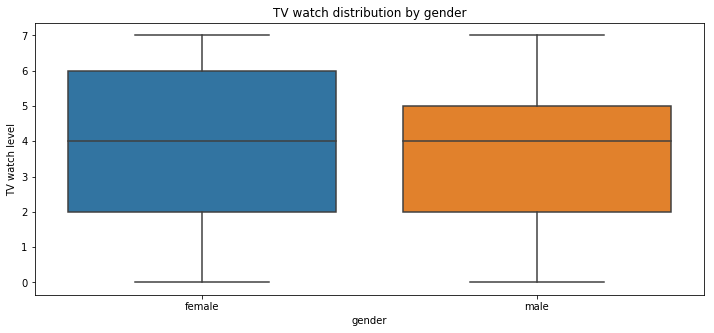

gndr
female    3.905352
male      3.859230
Name: tvtot, dtype: float64

In [0]:
# boxplot to visualize TV watch distribution by gender
_ = sns.boxplot(x = 'gndr', y = 'tvtot', data = df2012)
_.set(title = 'TV watch distribution by gender', xlabel = 'gender', ylabel = 'TV watch level')
plt.show()

# average tv watch between male and female respondents
df2012.groupby('gndr')['tvtot'].mean()

* Seems both men and women on an average weekday, in total, spend more than 1 (less than 1.5) hours watching television.

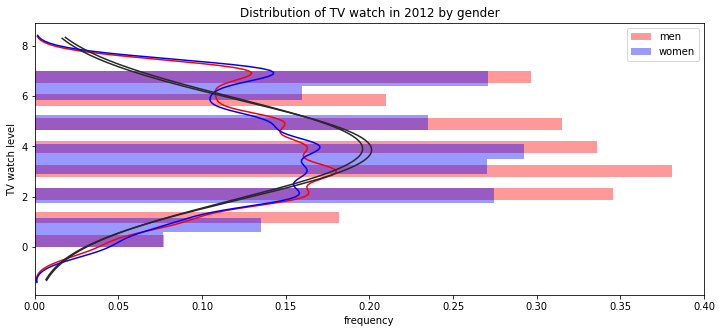

In [0]:
# distribution of TV watch in 2012 by gender

men_tv = df2012[df2012['gndr']=='male']['tvtot']
women_tv = df2012[df2012['gndr']=='female']['tvtot']
_ = sns.distplot(men_tv, fit = norm, kde = True, color = 'red', label = 'men', vertical = True)
_ = sns.distplot(women_tv, fit = norm, kde = True, color = 'blue', label = 'women', vertical = True)
_.set(title = "Distribution of TV watch in 2012 by gender", xlabel = 'frequency', ylabel = 'TV watch level')
plt.legend()
plt.show()


In [0]:
zresult = ztest(men_tv, women_tv)
print('z-test result: z-score = {}, pvalue = {}'.format(zresult[0], zresult[1]))
print('\t', utest(men_tv, women_tv))

z-test result: z-score = -0.7323552192640558, pvalue = 0.463951783687641
	 MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)


* As the test samples are independent, I applied **Z-test** (we can see some normality in distribution) and **Mann-Whitney U-test** (in case if our observation of normality is not true). In both  test results we could not reject **null hypothesis** which means *the two distributions are  similar in shape* or *the mean of two samples are not different*  

* ### 3.4 Who was more likely to believe people were fair in 2012, people living with a partner or people living alone

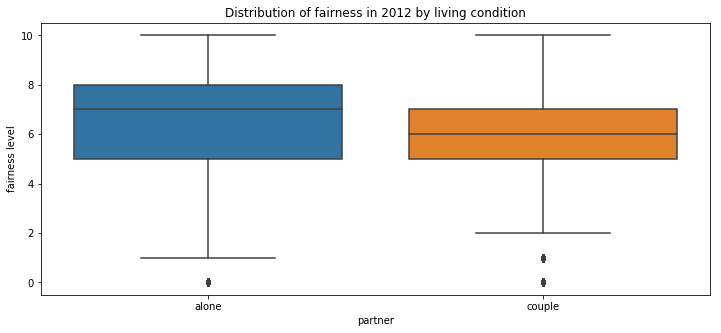

partner
alone     3.924076
couple    3.812296
Name: tvtot, dtype: float64

In [0]:
# boxplot to visualize fairness distribution by living condition
_ = sns.boxplot(x = 'partner', y = 'pplfair', data = df2012)
_.set(title = 'Distribution of fairness in 2012 by living condition', xlabel = 'partner', ylabel = 'fairness level')
plt.show()

# average tv watch between male and female respondents
df2012.groupby('partner')['tvtot'].mean()

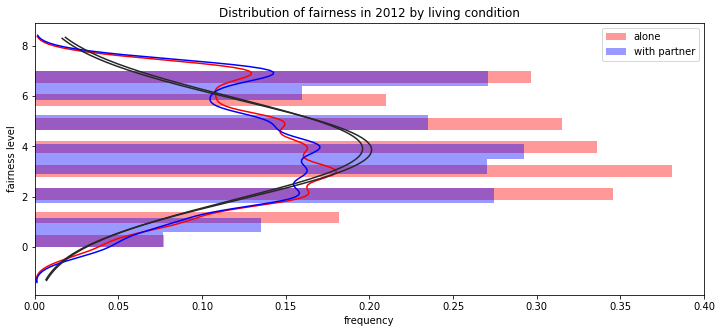

In [0]:
# histogram to see the people's fairness in 2012 by living condition

alone = df2012[df2012['partner']=='alone']['pplfair']
with_partner = df2012[df2012['partner']=='couple']['pplfair']
_ = sns.distplot(men_tv, fit = norm, kde = True, color = 'red', label = 'alone', vertical = True)
_ = sns.distplot(women_tv, fit = norm, kde = True, color = 'blue', label = 'with partner', vertical = True)
_.set(title = "Distribution of fairness in 2012 by living condition", xlabel = 'frequency', ylabel = 'fairness level')
plt.legend()
plt.show()


In [0]:
zresult = ztest(alone, with_partner)
print('z-test result: z-score = {}, pvalue = {}'.format(zresult[0], zresult[1]))
print('\t', utest(men_tv, women_tv))

z-test result: z-score = 3.0430439318464235, pvalue = 0.002341981399417623
	 MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)


* Seems both, people living with partner and alone, agree on how unfair are people. 

* ### 3.5 How often people in different countries met socially in 2014. Are there differences, and if so, which countries stand out?
I'll pick 3 countries to compare and I think it would be very interesting to observe social activeness or engagement of people from  countries with different from each other cultures.

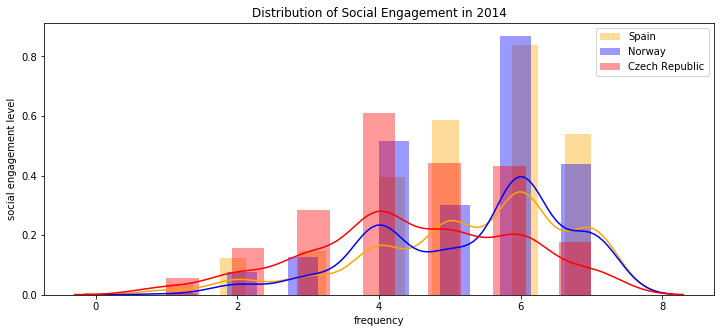

In [106]:

spain = df2014[df2014['cntry'] == 'ES']['sclmeet']
norway = df2014[df2014['cntry'] == 'NO']['sclmeet']
czech = df2014[df2014['cntry'] == 'CZ']['sclmeet']

_ = sns.distplot(spain, kde = True, color = 'orange', label = 'Spain')
_ = sns.distplot(norway, kde = True, color = 'blue', label = 'Norway')
_ = sns.distplot(czech, kde = True, color = 'red', label = 'Czech Republic')
_.set(title = "Distribution of Social Engagement in 2014", xlabel = 'frequency', ylabel = 'social engagement level')
plt.legend()
plt.show()

* ### let's try *One-way ANOVA* and try to inspect the difference visually

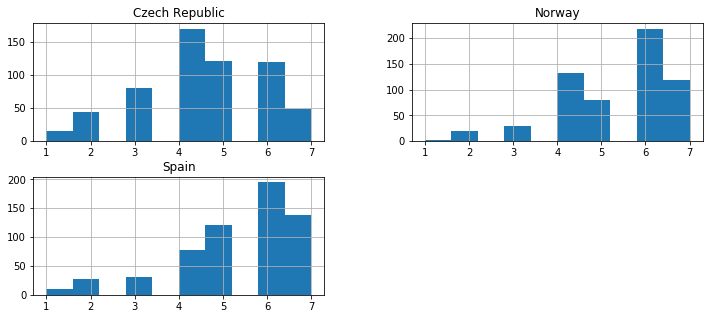

Spain             5.353333
Norway            5.333333
Czech Republic    4.486667
dtype: float64


In [0]:
df_sclmeet = pd.DataFrame()

df_sclmeet['Spain'] = spain[:600].tolist()
df_sclmeet['Norway'] = norway[:600].tolist()
df_sclmeet['Czech Republic'] = czech[:600].tolist()

df_sclmeet.hist()
plt.show()

print(df_sclmeet.mean())

* While none of the three distributions are very pretty, it still seems as though they are sufficiently close to the normal distribution  that the mean and standard deviation would give us useful information. We are comparing three unrelated groups of data, so the appropriate parametric choice is a **one-way Analysis of Variance (ANOVA).**

F-score = 70.27197995327798, pvalue = 2.112765366336169e-30


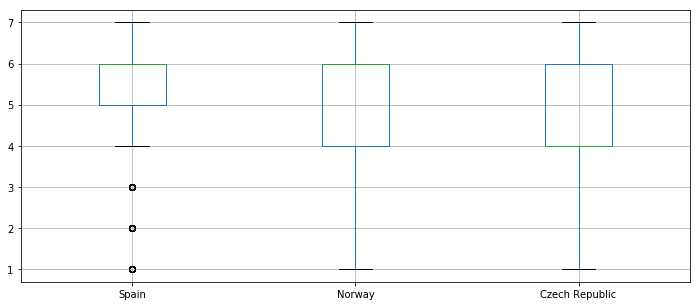

In [104]:
# visualize data
df_sclmeet.boxplot()

F, p = f_oneway(spain, norway, czech)

print('F-score = {}, pvalue = {}'.format(F, p))

It appears that the three groups (Spain, Norway and Czech Republic)) are likely to differ in the population (p < .00002). But which group is the odd one out? Returning to the histograms above, visual inspection suggests that the most of respondents from Czech Republic rated their social acivity as 4 or 5, while most respondents from Norway and Spain rate the same as 6 or 7. 

* ### Multiple Testing Correction via *Turkey's HSD test*

In [0]:
# Turkey's HSD test

scl_meet = np.asarray(spain.tolist() + norway.tolist() + czech.tolist())
countries = np.array(['ES', 'NO', 'CZ'])
countries = np.repeat(countries, 800)

tukey = pairwise_tukeyhsd(endog=scl_meet[52:],     # Data
                          groups=countries,        # Groups
                          alpha=0.05)              # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CZ,ES,0.5875,0.4196,0.7554,True
CZ,NO,0.6025,0.4346,0.7704,True
ES,NO,0.015,-0.1529,0.1829,False


* Turkey's HSD test result shows that the social engagement level between Norwegian and Spanish people does not differ significantly. However, Czech people seems to be less tend to meet their friends , relatives or cloleagues compared to Norway and Spain (**nul hypothesis** for CZ group rejected). So, our conclusion from one-way ANOVA + visual inspection is correct.

### 3.6 How often people in different countries  took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Now I'll check social activity level for above choosen countries.

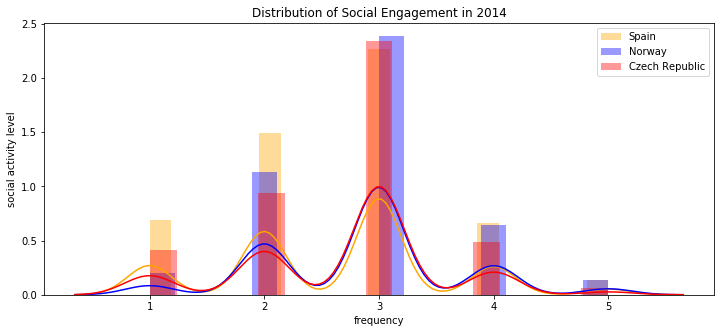

In [107]:

spain = df2014[df2014['cntry'] == 'ES']['sclact']
norway = df2014[df2014['cntry'] == 'NO']['sclact']
czech = df2014[df2014['cntry'] == 'CZ']['sclact']

_ = sns.distplot(spain, kde = True, color = 'orange', label = 'Spain')
_ = sns.distplot(norway, kde = True, color = 'blue', label = 'Norway')
_ = sns.distplot(czech, kde = True, color = 'red', label = 'Czech Republic')
_.set(title = "Distribution of Social Engagement in 2014", xlabel = 'frequency', ylabel = 'social activity level')
plt.legend()
plt.show()

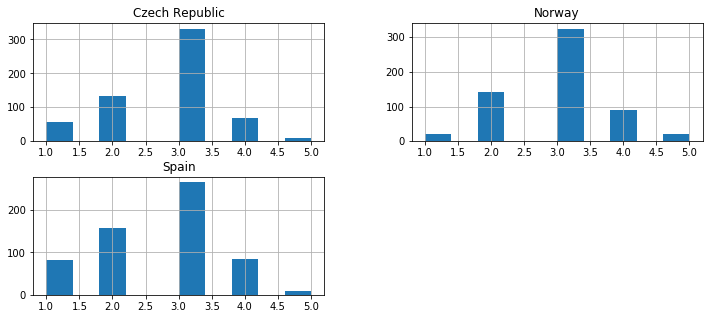

Spain             2.631667
Norway            2.906667
Czech Republic    2.726667
dtype: float64
F-score = 14.613491464335244, pvalue = 4.909229966078696e-07


In [110]:
df_sclact = pd.DataFrame()

df_sclact['Spain'] = spain[:600].tolist()
df_sclact['Norway'] = norway[:600].tolist()
df_sclact['Czech Republic'] = czech[:600].tolist()

df_sclact.hist()
plt.show()

print(df_sclact.mean())

F, p = f_oneway(spain, norway, czech)

print('F-score = {}, pvalue = {}'.format(F, p))

It appears our test result rejects **null hypothesis** (p<0.0000005) and if we look at the above visualized histograms it's hard to detect the difference in sample variances.

* ### Turkey's HSD test

In [112]:
# Turkey's HSD test

scl_act = np.asarray(spain.tolist() + norway.tolist() + czech.tolist())
countries = np.array(['ES', 'NO', 'CZ'])
countries = np.repeat(countries, 800)

tukey = pairwise_tukeyhsd(endog=scl_act[52:],     # Data
                          groups=countries,        # Groups
                          alpha=0.05)              # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CZ,ES,-0.1237,-0.2277,-0.0198,True
CZ,NO,0.1263,0.0223,0.2302,True
ES,NO,0.25,0.1461,0.3539,True


* Here we tried multiple test correction and for all cases the **null hypothesis** is rejected meaning all three samples have significant difference in variance.